In [1]:
# get zip file
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-10-07 10:59:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   214MB/s    in 0.3s    

2022-10-07 10:59:30 (214 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
from zipfile import ZipFile

def OpenZip(path):
  with ZipFile(path, "r") as z:
    z.extractall()
    print("Done!")

OpenZip("/content/cats_and_dogs_filtered.zip")

Done!


In [3]:
import os 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
base_dir = "/content/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

In [5]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.774.jpg', 'cat.244.jpg', 'cat.337.jpg', 'cat.851.jpg', 'cat.614.jpg', 'cat.78.jpg', 'cat.130.jpg', 'cat.354.jpg', 'cat.491.jpg', 'cat.808.jpg']
['dog.417.jpg', 'dog.410.jpg', 'dog.669.jpg', 'dog.672.jpg', 'dog.643.jpg', 'dog.788.jpg', 'dog.280.jpg', 'dog.542.jpg', 'dog.301.jpg', 'dog.570.jpg']


In [6]:
print("Train cats: ", len(os.listdir(train_cats_dir)))
print("Train dogs: ", len(os.listdir(train_dogs_dir)))
print("Validation cats: ", len(os.listdir(validation_cats_dir)))
print("Validation cats: ", len(os.listdir(validation_dogs_dir)))

Train cats:  1000
Train dogs:  1000
Validation cats:  500
Validation cats:  500


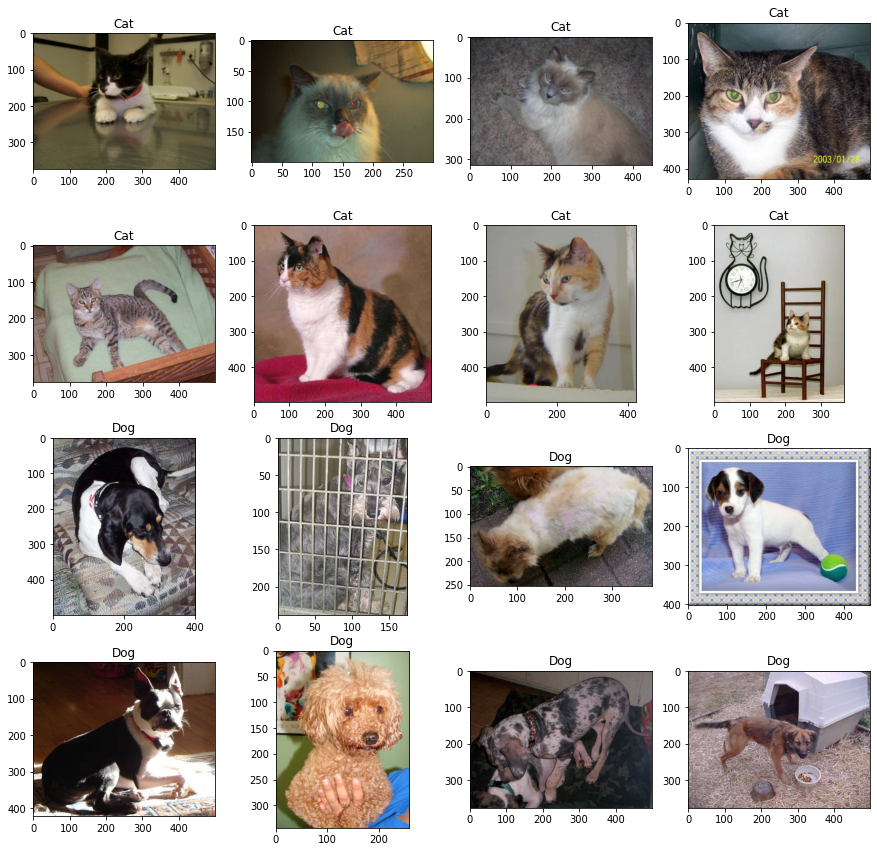

In [7]:
plt.figure(figsize=(15,15))
pic_idx = 8

next_cat_fig = [os.path.join(train_cats_dir, cat) for cat in train_cats_fnames[pic_idx-8:pic_idx]]
next_dog_fig = [os.path.join(train_dogs_dir, dog) for dog in train_dogs_fnames[pic_idx-8:pic_idx]]

for i, path in enumerate(next_cat_fig + next_dog_fig):
  plt.subplot(4, 4, i+1)
  if i <8:
    plt.title("Cat")
  else:
    plt.title("Dog")
  im = plt.imread(path)
  plt.imshow(im)

In [11]:
model = tf.keras.Sequential([tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Dropout(0.2),
                             
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 41472)            

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255.)
val_gen = ImageDataGenerator(rescale=1/255.)

train_generator = train_gen.flow_from_directory(train_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode="binary")
val_generator = val_gen.flow_from_directory(validation_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
hist = model.fit(x = train_generator,
                 validation_data =val_generator,
                 epochs=10,
                 verbose=2)

Epoch 1/10
63/63 - 9s - loss: 0.7838 - accuracy: 0.5400 - val_loss: 0.6788 - val_accuracy: 0.5230 - 9s/epoch - 140ms/step
Epoch 2/10
63/63 - 8s - loss: 0.6403 - accuracy: 0.6380 - val_loss: 0.6447 - val_accuracy: 0.6400 - 8s/epoch - 128ms/step
Epoch 3/10
63/63 - 8s - loss: 0.5770 - accuracy: 0.7110 - val_loss: 0.6202 - val_accuracy: 0.6690 - 8s/epoch - 127ms/step
Epoch 4/10
63/63 - 8s - loss: 0.4359 - accuracy: 0.8005 - val_loss: 0.6264 - val_accuracy: 0.6890 - 8s/epoch - 128ms/step
Epoch 5/10
63/63 - 8s - loss: 0.3089 - accuracy: 0.8715 - val_loss: 0.7316 - val_accuracy: 0.6930 - 8s/epoch - 128ms/step
Epoch 6/10
63/63 - 8s - loss: 0.2227 - accuracy: 0.9100 - val_loss: 0.7388 - val_accuracy: 0.6870 - 8s/epoch - 129ms/step
Epoch 7/10
63/63 - 9s - loss: 0.1204 - accuracy: 0.9690 - val_loss: 0.8818 - val_accuracy: 0.6840 - 9s/epoch - 142ms/step
Epoch 8/10
63/63 - 8s - loss: 0.0722 - accuracy: 0.9825 - val_loss: 1.0396 - val_accuracy: 0.6850 - 8s/epoch - 128ms/step
Epoch 9/10
63/63 - 8s - 

In [16]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for f in uploaded.keys():
  path = "/content/" + f
  im = image.load_img(path, target_size=(150,150))
  x = image.img_to_array(im)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes)

  if classes[0]>0.5:
    print(f + " is a dog.")
  else:
    print(f + " is a cat.")

Saving indir.jpg to indir.jpg
[[0.00544952]]
indir.jpgis a cat.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


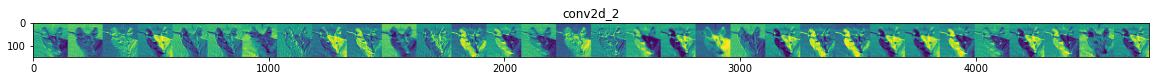

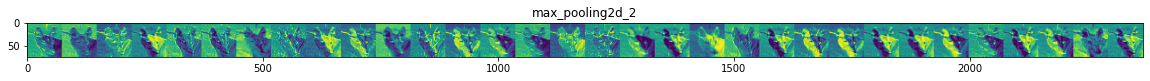

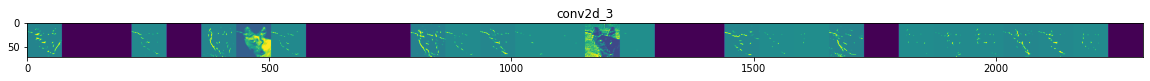

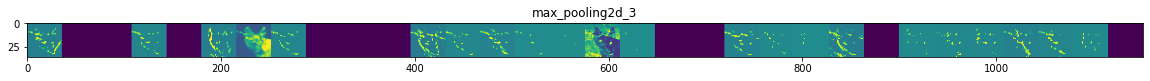

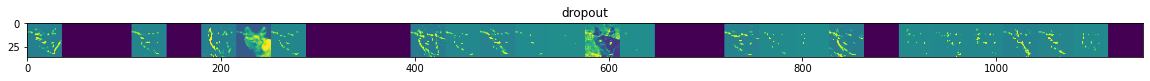

In [19]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cats_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dogs_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [23]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

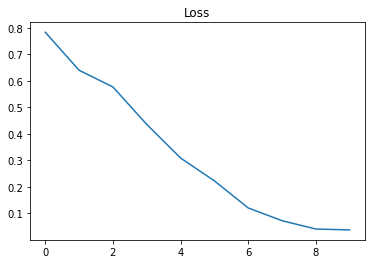

In [26]:
epochs = range(len(hist.history["accuracy"]))

plt.title("Loss")
plt.plot(epochs, hist.history["loss"])

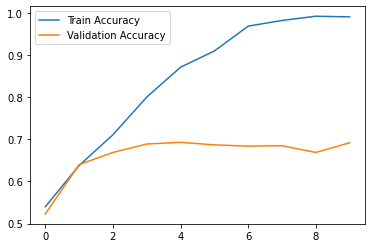

In [29]:
plt.plot(epochs, hist.history["accuracy"])
plt.plot(epochs, hist.history["val_accuracy"])
plt.legend(["Train Accuracy", "Validation Accuracy"])

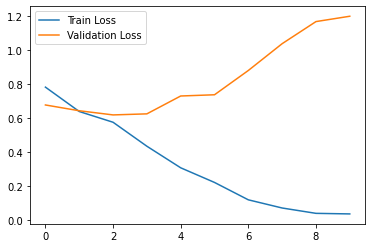

In [30]:
plt.plot(epochs, hist.history["loss"])
plt.plot(epochs, hist.history["val_loss"])
plt.legend(["Train Loss", "Validation Loss"])